Import the following libraries:

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
%matplotlib inline

Supress any future warnings

In [2]:
# Suppress all future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Allow users to manually input a limited number of stocks they own or are interested in that are known for consistent dividend growth.
For the first version, you could set a maximum number (e.g., 5 different stocks).

In [3]:
# List of stocks in portfolio
stocks = ["JNJ", "PG", "KO", "MCD", "T"]


Display the current value of each stock and its dividend yield.
Showcase the history of dividend growth for each stock over a set period (e.g., past 5 years).

In [4]:
# Download historical data for each stock
data = yf.download(stocks, period="3mo")



[*********************100%%**********************]  5 of 5 completed


In [5]:
# Get the most recent data points
data = data["Adj Close"][-5:]
data = data.dropna(axis=1) # drop any column with NaN values

In [6]:
# Display current value and dividend yield
for stock in stocks:
    print("Current Adj Close for {} is ${:.2f}".format(stock, data[stock][-1]))
    print("Current Dividend Yield for {} is {:.2f}%".format(stock, yf.Ticker(stock).info["dividendYield"] * 100))
    print()

Current Adj Close for JNJ is $156.85
Current Dividend Yield for JNJ is 3.03%

Current Adj Close for PG is $144.69
Current Dividend Yield for PG is 2.60%

Current Adj Close for KO is $52.89
Current Dividend Yield for KO is 3.48%

Current Adj Close for MCD is $248.31
Current Dividend Yield for MCD is 2.69%

Current Adj Close for T is $14.36
Current Dividend Yield for T is 7.73%



Plot the dividend growth history for each stock.

<Axes: title={'center': 'Dividend History'}, xlabel='Date'>

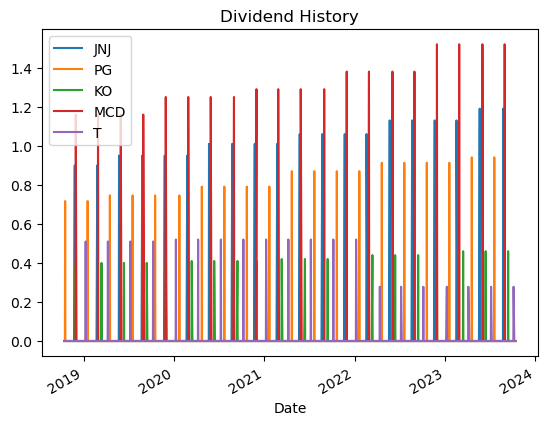

In [7]:
# Plot dividend history
dividend_history = pd.DataFrame()
for stock in stocks:
    dividend_history[stock] = yf.Ticker(stock).history(period="5Y")["Dividends"]
dividend_history.plot(title="Dividend History")


Introduce a basic score for each stock based on factors like payout ratio, earnings stability, and debt levels. Ratings could be simplified to levels like "Safe", "Moderate Risk", and "High Risk".

In [8]:
# Calculate dividend safety score for each stock
def get_dividend_safety_score(stock):
    # Get metrics from Yahoo Finance
    info = yf.Ticker(stock).info
    current_dividend_yield = info["dividendYield"]
    current_payout_ratio = info["payoutRatio"]
    eps = info["trailingEps"]
    # Calculate dividend safety score
    score = 0
    if current_dividend_yield > 0:
        score += 1
    if current_payout_ratio < 0.5:
        score += 1
    if eps > 0:
        score += 1
    return score

# Display dividend safety score for each stock
for stock in stocks:
    print("Dividend Safety Score for {} is {}".format(stock, get_dividend_safety_score(stock)))
    print()

Dividend Safety Score for JNJ is 2

Dividend Safety Score for PG is 2

Dividend Safety Score for KO is 2

Dividend Safety Score for MCD is 2

Dividend Safety Score for T is 1



<Axes: title={'center': 'Dividend Safety Scores'}>

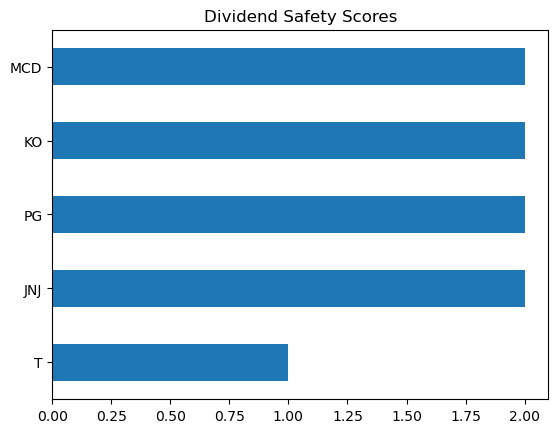

In [9]:
# Display dividend safety score for each stock in a bar chart
scores = {}
for stock in stocks:
    scores[stock] = get_dividend_safety_score(stock)
scores = pd.Series(scores)
scores.sort_values(inplace=True)
scores.plot(kind="barh", title="Dividend Safety Scores")


In [10]:
# Simplify the levels to "Safe", "Moderate Risk", and "High Risk".
def get_dividend_safety_score(stock):
    # Get metrics from Yahoo Finance
    info = yf.Ticker(stock).info
    current_dividend_yield = info["dividendYield"]
    current_payout_ratio = info["payoutRatio"]
    eps = info["trailingEps"]
    # Calculate dividend safety score
    score = 0
    if current_dividend_yield > 0:
        score += 1
    if current_payout_ratio < 0.5:
        score += 1
    if eps > 0:
        score += 1
    # Simplify the levels to "Safe", "Moderate Risk", and "High Risk"
    if score == 3:
        return "Safe"
    elif score == 2:
        return "Moderate Risk"
    else:
        return "High Risk"
    
# Display dividend safety score for each stock
for stock in stocks:
    print("Dividend Safety Score for {} is {}".format(stock, get_dividend_safety_score(stock)))
    print()


Dividend Safety Score for JNJ is Moderate Risk

Dividend Safety Score for PG is Moderate Risk

Dividend Safety Score for KO is Moderate Risk

Dividend Safety Score for MCD is Moderate Risk

Dividend Safety Score for T is High Risk



Create a watchlist to keep an eye on potential dividend growth stars of the future.

In [12]:
# Create an empty watchlist
watchlist = []

# Function to add a stock to the watchlist
def add_to_watchlist(stock):
    watchlist.append(stock)
    print("Added {} to watchlist".format(stock))

# Function to remove a stock from the watchlist
def remove_from_watchlist(stock):
    watchlist.remove(stock)
    print("Removed {} from watchlist".format(stock))

# Function to display the watchlist
def display_watchlist():
    print("Stocks on watchlist:")
    for stock in watchlist:
        print(stock)




In [15]:
# Function to add a stock to the watchlist
def add_to_watchlist(stock_symbol):
    if stock_symbol not in watchlist:
        watchlist.append(stock_symbol)
        print(f"{stock_symbol} has been added to your watchlist.")
    else:
        print(f"{stock_symbol} is already in your watchlist.")

# Function to remove a stock from the watchlist
def remove_from_watchlist(stock_symbol):
    if stock_symbol in watchlist:
        watchlist.remove(stock_symbol)
        print(f"{stock_symbol} has been removed from your watchlist.")
    else:
        print(f"{stock_symbol} is not in your watchlist.")

# Function to display the watchlist
def display_watchlist():
    print("Stocks on watchlist:")
    for stock in watchlist:
        print(stock)

In [14]:
# User interactions to add stocks to the watchlist
while True:
    print("\nYour Watchlist:", watchlist)
    user_input = input("Enter a stock symbol to add it to your watchlist (or 'q' to quit): ").upper()
    if user_input == 'Q':
        break
    if user_input in stocks:
        add_to_watchlist(user_input)
    else:
        print("Invalid stock symbol. Please enter a valid symbol from your portfolio.")

# Display the final watchlist
print("\nYour Watchlist:", watchlist)


Your Watchlist: []
T has been added to your watchlist.

Your Watchlist: ['T']
MCD has been added to your watchlist.

Your Watchlist: ['T', 'MCD']
MCD is already in your watchlist.

Your Watchlist: ['T', 'MCD']

Your Watchlist: ['T', 'MCD']


In [16]:
# User interactions to remove stocks from the watchlist
while True:
    print("\nYour Watchlist:", watchlist)
    user_input = input("Enter a stock symbol to remove it from your watchlist (or 'q' to quit): ").upper()
    if user_input == 'Q':
        break
    if user_input in stocks:
        remove_from_watchlist(user_input)
    else:
        print("Invalid stock symbol. Please enter a valid symbol from your portfolio.")


Your Watchlist: ['T', 'MCD']
T has been removed from your watchlist.

Your Watchlist: ['MCD']
Invalid stock symbol. Please enter a valid symbol from your portfolio.

Your Watchlist: ['MCD']


Display watchlist

In [19]:
# Display the final watchlist
print("\nYour Watchlist:", watchlist)



Your Watchlist: ['MCD']


Create an alert system to notify users when a stock's dividend yield reaches a certain level.

In [23]:
# Create a alert list
alerts = []

# Function to add a stock to the alert list
def add_to_alerts(stock_symbol, target_price):
    if stock_symbol not in alerts:
        alerts.append([stock_symbol, target_price])
        print(f"{stock_symbol} has been added to your alerts.")
    else:
        print(f"{stock_symbol} is already in your alerts.")

# Function to remove a stock from the alert list
def remove_from_alerts(stock_symbol):
    if stock_symbol in alerts:
        alerts.remove(stock_symbol)
        print(f"{stock_symbol} has been removed from your alerts.")
    else:
        print(f"{stock_symbol} is not in your alerts.")

# Function to display the alert list
def display_alerts():
    print("Stocks on alert:")
    for stock in alerts:
        print(stock)



In [24]:
# User interactions to add stocks to the alert list
while True:
    print("\nYour Alerts:", alerts)
    user_input = input("Enter a stock symbol to add it to your alerts (or 'q' to quit): ").upper()
    if user_input == 'Q':
        break
    if user_input in stocks:
        target_price = float(input("Enter the target price for {} alerts: ".format(user_input)))
        add_to_alerts(user_input, target_price)
    else:
        print("Invalid stock symbol. Please enter a valid symbol from your portfolio.")

# Display the final alert list
print("\nYour Alerts:", alerts)


Your Alerts: []
MCD has been added to your alerts.

Your Alerts: [['MCD', 200.0]]
Invalid stock symbol. Please enter a valid symbol from your portfolio.

Your Alerts: [['MCD', 200.0]]

Your Alerts: [['MCD', 200.0]]


In [25]:
# User interactions to remove stocks from the alert list
while True:
    print("\nYour Alerts:", alerts)
    user_input = input("Enter a stock symbol to remove it from your alerts (or 'q' to quit): ").upper()
    if user_input == 'Q':
        break
    if user_input in stocks:
        remove_from_alerts(user_input)
    else:
        print("Invalid stock symbol. Please enter a valid symbol from your portfolio.")

# Display the final alert list
print("\nYour Alerts:", alerts)


Your Alerts: [['MCD', 200.0]]
MCD is not in your alerts.

Your Alerts: [['MCD', 200.0]]

Your Alerts: [['MCD', 200.0]]
